In [1]:
import sys, os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import gsd_uncertainty
import grainsizing
import plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "F:/cellpose/fh/"
gsds = grainsizing.load_grain_set([PATH],gsd_str='grain')
num_it  = 100
column_name='convex hull: b axis (px)'

## Calculate percentile uncertainties

In [6]:
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds,num_it=num_it,mute=True,column_name=column_name)

bootstrapping: 100%|██████████| 56/56 [00:03<00:00, 17.65gsd/s]


In [8]:
sfm_error_l = gsd_uncertainty.compile_sfm_error(from_file='F:/cellpose/x_pre_Nov_22/code_demo/OM_err.csv')

In [9]:
res_dict_om = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,sfm_type='OM',num_it=num_it,mute=True,column_name=column_name)

MC_SfM: 100%|██████████| 56/56 [05:50<00:00,  6.26s/gsd]


In [10]:
res_dict_si = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,num_it=num_it,mute=True,column_name=column_name)

MC_SfM: 100%|██████████| 56/56 [04:07<00:00,  4.41s/gsd]


### Compare uncertainty methods

In [41]:
mcs,ids = gsd_uncertainty.read_set_unc(PATH)
mcs = [k for k in mcs if 'fh_boosted_2' in k]
elem={
        'CI_bounds':'','median':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

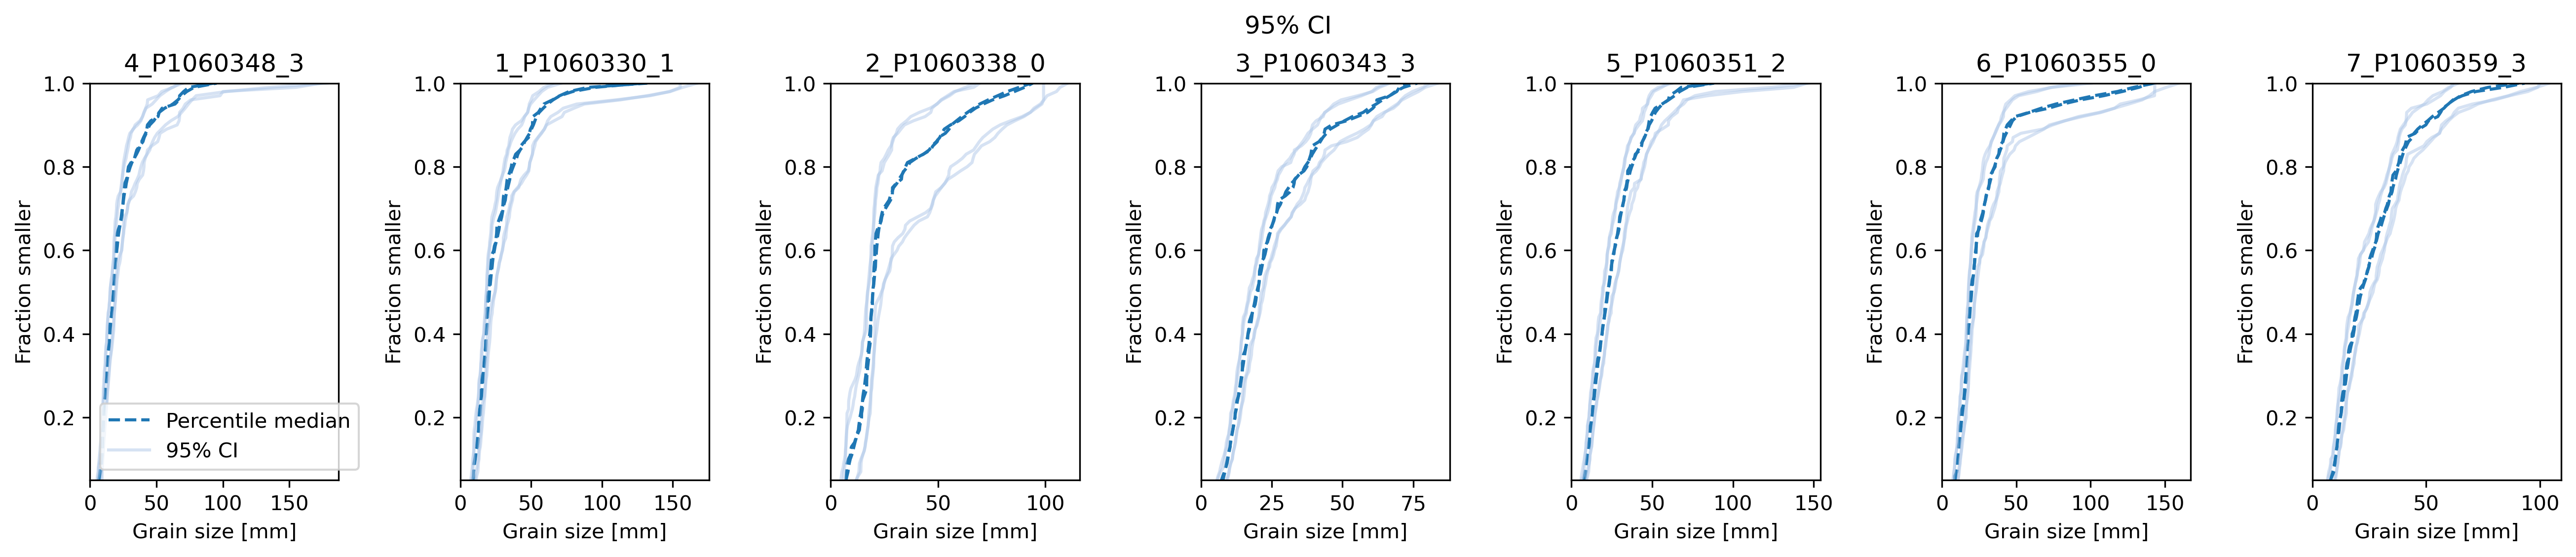

In [60]:
fig = plt.figure(figsize=(len(ids)*2.5,10), dpi=300)
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            df = gsd_uncertainty.read_unc(mcs[i])
            plt.subplot(3,len(ids),j+1)
            plotting.plot_gsd(df,elem=elem)
            plt.title(ids[j])
            if i == 0:
                plt.legend()
    plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.suptitle('95% CI')
plt.tight_layout()

### Compare images

In [61]:
elem={
        'CI_area':'','input':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

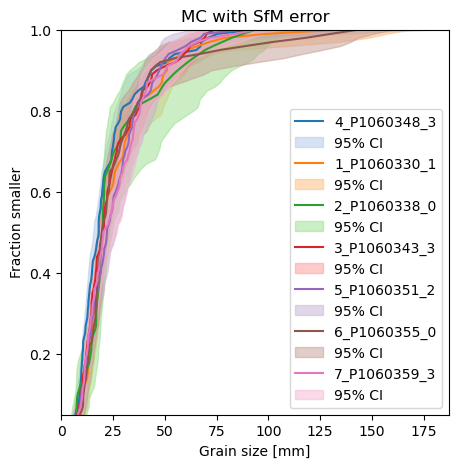

In [63]:
plt.figure(figsize=(5,5))
cix=0
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            if 'SfM' in mcs[i]:
                df = gsd_uncertainty.read_unc(mcs[i])
                plotting.plot_gsd(df,elem=elem,data_ID=ids[j],cix=cix)
    cix+=2
plt.title('MC with SfM error')
plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.legend();